#**AG2 - Actividad Guiada 2**
Nombre: Mikel Pérez Frutos <br>
Link:   https://colab.research.google.com/drive/1wuMk6f1jMaPs9nIH4K2inRI0VoV5TuHj?usp=sharing <br>
Github: https://github.com/mikelinnho/03MIAR---Algoritmos-de-Optimizacion
<br>




In [ ]:
import math
import itertools

##**Programación dinámica**
Problema: Viaje por el río <br>

**Definición**: <br>
Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante. <br>

**Características**:<br>
* Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante.<br>
* Debe verificar el principio de optimalidad de Bellman: “en una secuencia óptima de decisiones, toda subsecuencia también es óptima”. <br>
* La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuántos recursos de espacio usaremos).<br>

###**Problema: Viaje por el río**<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

**Notas:**
* Consideramos una tabla TARIFAS(i, j) para almacenar todos los precios que nos ofrecen los embarcaderos. <br>
* Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima (modelado habitual para restricciones). <br>
* Establecer una tabla intermedia P(i, j) para guardar las soluciones óptimas parciales para ir desde i a j. <br>

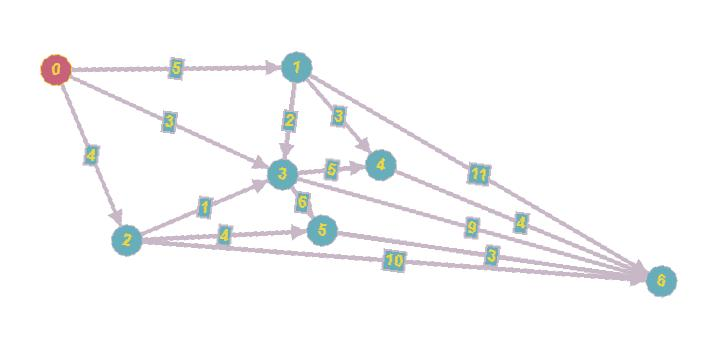

In [ ]:
##############################################
#  Viaje por el río - Programación dinámica  #
##############################################
def calcularPrecios(tarifas):
  #Definición: Cálculo de la matriz de PRECIOS y RUTAS
  #Parámetros:
  # - tarifas: Matriz con las tarifas
  #Return:
  # - precios: Contiene la matriz del mejor precio para ir de un nodo a otro.
  # - RUTAS: Contiene los nodos intermedios para ir de un nodo a otro.

  #Total de Nodos
  N = len(tarifas[0])
  
  #Inicialización de la tabla de precios
  precios = [[9999]*N for i in [9999]*N]  #n x n 
  ruta = [[""]*N for i in [""]*N]
  
  #Se recorren todos los nodos con dos bucles(origen - destino)
  # para ir construyendo la matriz de PRECIOS.
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = tarifas[i][j]
      ruta[i][j] = i
      for k in range(i, j):
        if precios[i][k] + tarifas[k][j] < MIN:
            MIN = min(MIN, precios[i][k] + tarifas[k][j])
            ruta[i][j] = k
        precios[i][j] = MIN
        
  return precios, ruta

def calcularRuta(ruta, desde, hasta):
  #Definición: Cálculo de la ruta usando la matriz RUTA
  #Parámetros:
  # - ruta: Contiene los nodos intermedios para ir de un nodo a otro.
  # - desde: Nodo de inicio.
  # - hasta: Nodo final.
  #Return: Ruta calculada más barata.

  if desde == ruta[desde][hasta]:
    return desde 
  else:
    return str(calcularRuta(ruta, desde, ruta[desde][hasta])) +  ',' + str(ruta[desde][hasta]) 

In [ ]:
TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

PRECIOS, RUTA = calcularPrecios(TARIFAS)  

print("PRECIOS:")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA:")  
for i in range(len(TARIFAS)):
  print(RUTA[i])

print("\nLa ruta es: " + str(calcularRuta(RUTA, 3,6)))  

PRECIOS:
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA:
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']

La ruta es: 3


##**Ramificación y Poda** 
Problema: Asignación de tareas

In [ ]:
##############################################
# Asignación de tareas - Ramificación y Poda #
##############################################
def valor(S, C):
  #Definición: Cálculo del valor de una solucion parcial
  #Parámetros:
  # - S es una solución parcial P.ej (1,0,).
  # - C es la matriz de costes (o beneficios).
  #Return: Valor de la solución parcial.

  resultado = 0
  for i in range(len(S)):
    resultado += C[S[i]][i] 
  return resultado

def CI(S, C):
  #Definición: Estima una cota inferior para una solución parcial
  #Parámetros:
  # - S es una solución parcial P.ej (1,0,).
  # - C es la matriz de costes (o beneficios).
  #Return: Cota inferior de la solución parcial.

  resultado = 0
  #Valores establecidos:
  for i in range(len(S)):
    resultado += C[i][S[i]]

  #Estimación:
  for i in range(len(S), len(C)):
    resultado += min([C[j][i] for j in range(len(S), len(C))])
  return resultado

def CS(S, C):
  #Definición: Estima una cota superior para una solución parcial
  #Parámetros:
  # - S es una solución parcial P.ej (1,0,).
  # - C es la matriz de costes (o beneficios).
  #Return: Cota superior de la solución parcial.

  #Valores establecidos:
  resultado = 0
  #Valores establecidos:
  for i in range(len(S)):
    resultado += C[i][S[i]]

  #Estimación:
  for i in range(len(S), len(C)):
    resultado += max([C[j][i] for j in range(len(S), len(C))])
  return resultado

def crearHijos(nodo, N):
  #Definición: Genera tantos hijos como posibilidades haya para el siguiente elemento de la tupla
  #Ejemplo: nodo: (0,) y N: 4 -> (0, 1), (0, 2), (0, 3)
  #Parámetros:
  # - NODO es una tupla con los nodos
  # - N es el número de hijos
  #Return: Array de diccionarios con los nodos y sus hijos

  hijos = []
  for i in range(N):
    if i not in nodo:
      hijos.append({'s':nodo +(i,)})
  return hijos

def asignacionDeTareas_RP(C):
  #Definición: Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
  #Parámetros:
  # - C es la matriz de costes (o beneficios).
  #Return: Solución para la asignación de tareas.

  dimension = len(C)  
  mejorSolucion = tuple(i for i in range(len(C)))
  CotaSup = valor(mejorSolucion, C)

  nodos = []
  nodos.append({'s':(), 'ci': CI((), C)})

  iteracion = 0

  while(len(nodos) > 0):
    iteracion +=1
    nodoPrometedor = [min(nodos, key=lambda x:x['ci'])][0]['s']

    #Ramificacion:
    #Se generan los hijos:
    hijos = [{'s':x['s'], 'ci':CI(x['s'], C)} for x in crearHijos(nodoPrometedor, dimension)]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final:
    nodoFinal = [x for x in hijos if len(x['s']) == dimension]
    if len(nodoFinal) > 0: 
      if nodoFinal[0]['ci'] < CotaSup:
        CotaSup = nodoFinal[0]['ci']
        mejorSolucion = nodoFinal
 
    #Poda:
    hijos = [x for x in hijos if x['ci'] < CotaSup]

    #Añadimos los hijos:
    nodos.extend(hijos) 

    #Eliminamos el nodo ramificado:
    nodos = [x for x in nodos if x['s'] != nodoPrometedor]
   
  print("La solucion final es: ", mejorSolucion , " en " , iteracion , " iteraciones para dimension: " , dimension)

def asignacionDeTareas_FB(C):
  #Definición: Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
  #Parámetros:
  # - C es la matriz de costes (o beneficios).
  #Return: Solución para la asignación de tareas.

  mejorValor = 10e10
  mejorSolucion = ()

  for S in list(itertools.permutations(range(len(C)))):
    valorTemporal = valor(S, C)
    if valorTemporal < mejorValor:
      mejorValor, mejorSolucion = valorTemporal, S

  print("La mejor solucion es: ", mejorSolucion, " con valor ", mejorValor)

In [ ]:
C =[[11,12,18,40],
    [14,15,13,22],
    [11,17,19,23],
    [17,14,20,28]]

In [ ]:
print("Valor de una solución parcial:")
print(valor((3,2), C))

Valor de una solución parcial:
34


In [ ]:
print("Cota inferior para una solución parcial:")
print(CI((0,1), C))

Cota inferior para una solución parcial:
68


In [ ]:
print("Crear hijos para uno nodo:")
print(crearHijos((0,) , 4))
print(crearHijos((0, 1) , 4))

Crear hijos para uno nodo:
[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]
[{'s': (0, 1, 2)}, {'s': (0, 1, 3)}]


La solución para la matriz de costes dada sería:

In [ ]:
asignacionDeTareas_RP(C)

La solucion final es:  [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones para dimension:  4


###**Análisis de eficiencia de los algoritmos**

Para 5 dimensiones:

In [ ]:
from random import *
dimension = 5
C = [[randint(10,50) for j in range(dimension)] for i in range(dimension)]
print(C)
asignacionDeTareas_RP(C)
asignacionDeTareas_FB(C)

[[14, 37, 21, 36, 44], [45, 15, 36, 15, 49], [40, 49, 48, 20, 15], [39, 46, 18, 17, 27], [27, 31, 27, 48, 34]]
La solucion final es:  [{'s': (0, 1, 4, 3, 2), 'ci': 88}]  en  34  iteraciones para dimension:  5
La mejor solucion es:  (0, 1, 4, 3, 2)  con valor  88


Para 6 dimensiones:

In [ ]:
from random import *
dimension = 6
C = [[randint(10,50) for j in range(dimension)] for i in range(dimension)]
print(C)
asignacionDeTareas_RP(C)
asignacionDeTareas_FB(C)

[[27, 35, 22, 24, 29, 41], [13, 42, 43, 48, 24, 19], [37, 20, 31, 20, 40, 17], [14, 11, 25, 17, 23, 23], [36, 17, 24, 17, 10, 38], [34, 48, 27, 30, 10, 16]]
La solucion final es:  [{'s': (2, 0, 5, 1, 3, 4), 'ci': 90}]  en  28  iteraciones para dimension:  6
La mejor solucion es:  (1, 3, 0, 4, 5, 2)  con valor  90


Para 7 dimensiones

In [ ]:
from random import *
dimension = 7
C = [[randint(10,50) for j in range(dimension)] for i in range(dimension)]
print(C)
asignacionDeTareas_RP(C)
asignacionDeTareas_FB(C)

[[24, 31, 28, 14, 19, 34, 15], [14, 21, 46, 27, 14, 18, 46], [21, 46, 19, 29, 13, 30, 43], [35, 40, 36, 28, 38, 40, 20], [19, 39, 45, 21, 10, 42, 42], [19, 34, 36, 43, 21, 22, 22], [26, 33, 36, 42, 17, 39, 36]]
La solucion final es:  [{'s': (3, 0, 2, 6, 4, 5, 1), 'ci': 132}]  en  317  iteraciones para dimension:  7
La mejor solucion es:  (1, 6, 2, 0, 4, 5, 3)  con valor  132


Para 8 dimensiones:

In [ ]:
from random import *
dimension = 8
C = [[randint(10,50) for j in range(dimension)] for i in range(dimension)]
print(C)
asignacionDeTareas_RP(C)
asignacionDeTareas_FB(C)

[[19, 37, 45, 38, 49, 13, 13, 40], [13, 38, 33, 41, 28, 35, 49, 38], [11, 37, 24, 31, 26, 11, 15, 41], [44, 26, 14, 36, 13, 29, 34, 27], [46, 13, 13, 37, 34, 23, 36, 47], [13, 35, 32, 47, 23, 30, 11, 37], [40, 34, 30, 14, 19, 10, 48, 36], [15, 23, 41, 49, 11, 41, 28, 31]]
La solucion final es:  [{'s': (6, 0, 5, 2, 1, 4, 3, 7), 'ci': 132}]  en  1209  iteraciones para dimension:  8
La mejor solucion es:  (2, 4, 3, 6, 7, 0, 5, 1)  con valor  125


Para 9 dimensiones:

In [ ]:
from random import *
dimension = 9
C = [[randint(10,50) for j in range(dimension)] for i in range(dimension)]
print(C)
asignacionDeTareas_RP(C)
asignacionDeTareas_FB(C)

[[30, 36, 36, 45, 27, 26, 20, 36, 31], [49, 21, 10, 11, 48, 27, 27, 39, 13], [21, 49, 48, 33, 26, 25, 36, 35, 18], [34, 26, 33, 44, 22, 33, 30, 49, 15], [29, 35, 32, 49, 42, 37, 12, 30, 10], [37, 49, 21, 13, 30, 48, 28, 49, 38], [36, 37, 45, 16, 12, 47, 12, 48, 23], [13, 26, 26, 47, 17, 14, 42, 19, 26], [23, 37, 13, 28, 24, 29, 30, 42, 36]]
La solucion final es:  [{'s': (6, 2, 5, 1, 8, 3, 4, 7, 0), 'ci': 158}]  en  3143  iteraciones para dimension:  9
La mejor solucion es:  (2, 1, 8, 5, 6, 0, 4, 7, 3)  con valor  152


Para 10 dimensiones:

In [ ]:
from random import *
dimension = 10
C = [[randint(10,50) for j in range(dimension)] for i in range(dimension)]
print(C)
asignacionDeTareas_RP(C)
asignacionDeTareas_FB(C)

[[34, 33, 32, 11, 33, 15, 36, 47, 38, 17], [41, 11, 24, 40, 29, 20, 31, 16, 36, 10], [37, 47, 44, 22, 32, 26, 33, 44, 22, 31], [41, 33, 47, 26, 18, 40, 31, 18, 27, 36], [45, 32, 34, 24, 20, 50, 42, 27, 37, 28], [27, 11, 45, 27, 16, 44, 45, 26, 49, 50], [16, 47, 10, 39, 38, 11, 25, 28, 26, 42], [32, 31, 33, 24, 16, 43, 47, 18, 22, 29], [16, 45, 16, 20, 17, 33, 36, 14, 43, 31], [23, 25, 44, 12, 24, 20, 20, 31, 17, 46]]
La solucion final es:  [{'s': (5, 9, 8, 7, 3, 1, 2, 4, 0, 6), 'ci': 162}]  en  2796  iteraciones para dimension:  10
La mejor solucion es:  (8, 5, 6, 4, 7, 0, 9, 3, 2, 1)  con valor  162


Para 11 dimensiones:

In [ ]:
from random import *
dimension = 11
C = [[randint(10,50) for j in range(dimension)] for i in range(dimension)]
print(C)
asignacionDeTareas_RP(C)
asignacionDeTareas_FB(C)

[[37, 13, 28, 25, 13, 47, 25, 29, 11, 16, 37], [34, 36, 45, 49, 46, 44, 14, 14, 32, 23, 37], [26, 34, 23, 28, 39, 18, 40, 19, 39, 46, 36], [39, 32, 47, 20, 10, 26, 32, 20, 20, 15, 46], [40, 27, 25, 27, 18, 43, 44, 41, 33, 15, 46], [11, 25, 28, 23, 40, 42, 20, 12, 25, 22, 48], [21, 41, 33, 50, 26, 38, 28, 49, 12, 43, 14], [32, 46, 36, 35, 33, 11, 46, 40, 34, 41, 26], [27, 14, 23, 28, 31, 43, 21, 14, 40, 13, 38], [39, 41, 14, 44, 17, 39, 36, 37, 26, 19, 14], [26, 23, 21, 32, 22, 47, 17, 46, 24, 19, 25]]
La solucion final es:  [{'s': (8, 6, 7, 4, 9, 0, 10, 5, 1, 2, 3), 'ci': 165}]  en  931  iteraciones para dimension:  11
La mejor solucion es:  (5, 8, 9, 2, 3, 7, 10, 1, 0, 4, 6)  con valor  159


A partir de la 11 da problemas.

##**Descenso del gradiente**

In [ ]:
import math #Funciones matemáticas
import matplotlib.pyplot as plt #Generacion de gráficos (otra opcion seaborn)
import numpy as np #Tratamiento matriz N-dimensionales y otras
import random #Generación de números de forma aleatoria
from sympy import symbols #Símbolos para ecuaciones
from sympy.plotting import plot #Gráficas
from sympy.plotting import plot3d #Gráficas 3D

Vamos a buscar el mínimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Éste se encuentra en (x,y) = (0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
f = lambda X: X[0]**2 + X[1]**2 #Funcion
df = lambda X: [2*X[0] , 2*X[1]] #Gradiente

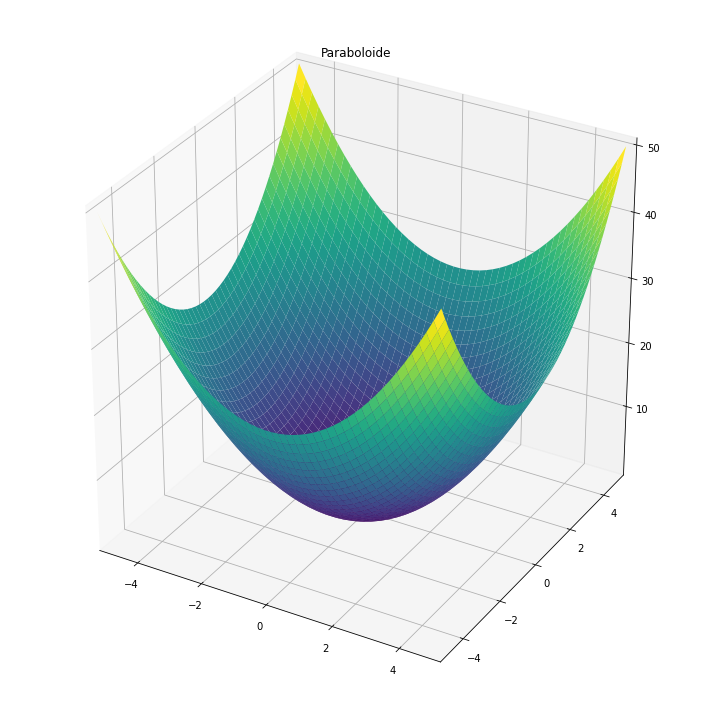

In [ ]:
x, y = symbols('x y')
plot3d(x**2 + y**2, (x,-5,5),(y,-5,5), title="Paraboloide", size=(10,10))

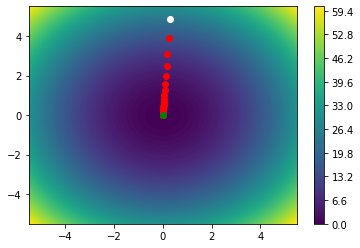


Solucion: [4.163397248507237e-06, 6.929733075344976e-05] 4.819453926201891e-09


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z:
resolucion = 100 
rango = 5.5
X = np.linspace(-rango,rango,resolucion) 
Y = np.linspace(-rango,rango,resolucion)
Z = np.zeros((resolucion,resolucion))

for ix ,x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

#Pinta el mapa de niveles de Z:
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio inicial y pintamos de blanco:
P = [random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1], "o", c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos:
TA=.1 

#Iteraciones:
iteraciones = 50
for _ in range(iteraciones):
  grad = df(P)
  P[0], P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1], "o", c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1], "o", c="green")
plt.show()
print("\nSolucion:" , P , f(P))


##**¿Te atreves a optimizar la función?**
La función es la siguiente:
$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>

Donde tendremos que calcular el punto óptimo:

In [ ]:
from sympy import *

def grad_f(f: str):
    vars_ = list((sympify(f).free_symbols))
    str_vars = [str(var) for var in vars_]
    vars_ = sorted(str_vars, key=lambda symbol: symbol)
    return lambdify(vars_, [diff(f, var) for var in vars_], modules="numpy")

Definir la función y el grandiente:

In [ ]:
f2= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]))
df2 = grad_f("sin(1/2 * x**2 - 1/4 * y**2 + 3)*cos(2*x + 1 - exp(y))")

Representar la función:

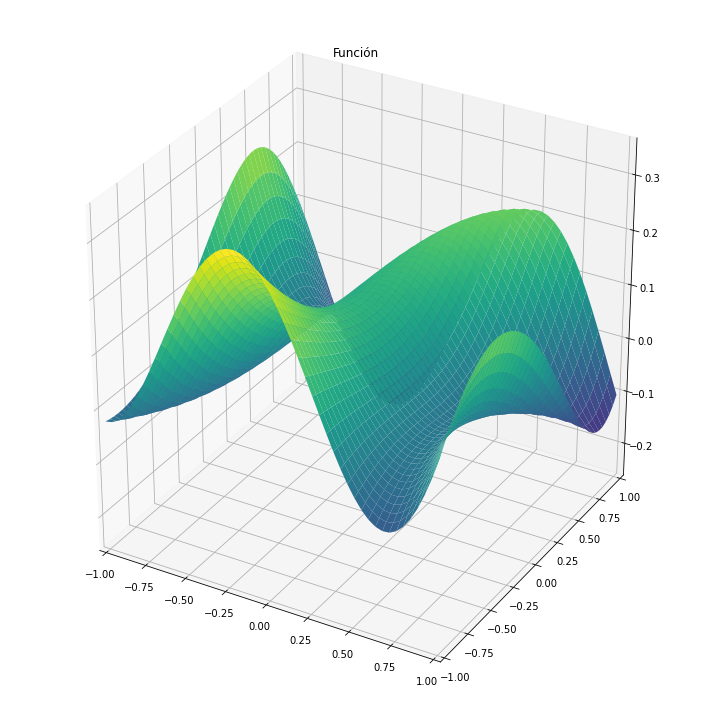

In [ ]:
x, y = symbols('x y')
plot3d(sin(1/2 * x**2 - 1/4 * y**2 + 3)*cos(2*x + 1 - exp(y)), (x,-1, 1),(y,-1, 1), title="Función", size=(10, 10))

Y para calcular el mínimo:

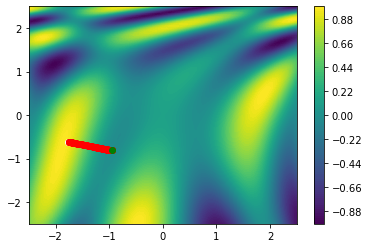


Solucion: -0.956311244097353 -0.8016637593276372 -0.03212181535734835


In [ ]:
from IPython.core.debugger import PyColorize

#Prepara los datos para dibujar mapa de niveles de Z:
resolucion = 100 
rango = 2.5
X = np.linspace(-rango,rango,resolucion) 
Y = np.linspace(-rango,rango,resolucion)
Z = np.zeros((resolucion,resolucion))

for ix ,x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f2([x, y])

#Pinta el mapa de niveles de Z:
plt.contourf(X, Y, Z, resolucion)
plt.colorbar() 

#Generamos un punto aleatorio inicial y pintamos de blanco:
Px = random.uniform(-2, 2)
Py = random.uniform(-2, 2)
plt.plot(Px, Py, "o", c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos:
TA = 0.01

#Iteraciones:
iteraciones = 100
for _ in range(iteraciones):
  grad = df2(Px, Py)
  Px, Py = Px - TA*grad[0] , Py - TA*grad[1]
  plt.plot(Px, Py, "o", c="red")

#Dibujamos el punto final y pintamos de verde:
plt.plot(Px, Py, "o", c="green")
plt.show()

print("\nSolucion:" , Px, Py, f2([Px, Py]))